In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

In [2]:
7.0, 119.1
64.0, 122.3
70.1, 128.1
259.2, 127.0
407.4, 143.3
588.1, 145.4
654.7, 146.7

(654.7, 146.7)

In [3]:
data1x = [7.0, 64.0, 71.1, 407.4, 588.1,654.7]
data2x = [259.2]
data1y = [119.1, 122.3, 128.1, 143.3, 145.4, 146.7]
data2y = [127.0]
err1 = [5,5,5,6,6,6]

fermi = 228
mc = 127.7
mc_err = 0.2
tpc = 129.5
tpc_err = 0.5
tpc_up = 0.028*tpc
tpc_down = 0.022*tpc
tpc_syst = [np.sqrt(tpc_down**2+tpc_err**2),np.sqrt(tpc_up**2+tpc_err**2)]

pmt = 126.5
pmt_err = 0.4
pmt_down = 0.028*pmt
pmt_up = 0.032*pmt
pmt_syst = [np.sqrt(pmt_down**2+pmt_err**2),np.sqrt(pmt_up**2+pmt_err**2)]

In [4]:
print(tpc_down, tpc_up)
print(pmt_down, pmt_up)

2.8489999999999998 3.626
3.5420000000000003 4.048


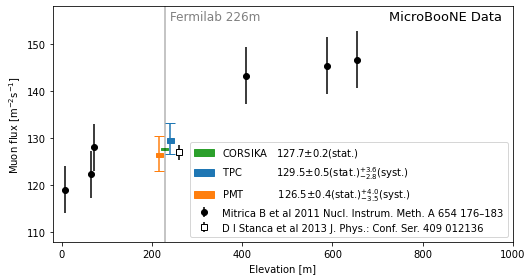

In [11]:
fig, ax = plt.subplots(figsize=(7.5,4))
ax.set_xlim(-20,1000)
ax.set_ylim(108,158)
ax.axvline(x=fermi, color='k', alpha=0.3)
ax.set_xlabel('Elevation [m]')
ax.set_ylabel(r'Muon flux [m$^{-2}$s$^{-1}$]')

plt.errorbar(data1x,data1y, yerr=err1, fmt='ko', label='Mitrica B et al 2011 Nucl. Instrum. Meth. A 654 176–183')
plt.errorbar(data2x,data2y, yerr=1.6, fmt='ks', mfc='white', label='D I Stanca et al 2013 J. Phys.: Conf. Ser. 409 012136')

#TPC 
ax.errorbar([fermi+12, -500],[tpc, 0],yerr=[[tpc_syst[0],0],[tpc_syst[1],0]], fmt='none', capsize=5)
ax.errorbar([fermi-12, -500],[pmt, 0],yerr=[[pmt_syst[0],0],[pmt_syst[1],0]], fmt='none', capsize=5)
width_err=8

rect = Rectangle((fermi-width_err,mc-mc_err),2*width_err,2*mc_err,edgecolor='C2',
                  facecolor='C2', label=r'CORSIKA {0:7.1f}$\pm${1:0.1f}(stat.)'.format(mc, mc_err))
ax.add_patch(rect)

rect = Rectangle((fermi+12-width_err,tpc-tpc_err),2*width_err,2*tpc_err,edgecolor='C0',
                  facecolor='C0', label=r'TPC {0:15.1f}$\pm${1:0.1f}(stat.)'.format(tpc,tpc_err)+'${ }^{+3.6}_{-2.8}$(syst.)')
ax.add_patch(rect)
rect = Rectangle((fermi-12-width_err,pmt-pmt_err),2*width_err,2*pmt_err,edgecolor='C1',
                  facecolor='C1', label=r'PMT {0:15.1f}$\pm${1:0.1f}(stat.)'.format(pmt,pmt_err)+'${ }^{+4.0}_{-3.5}$(syst.)')
ax.add_patch(rect)
ax.legend(loc='lower right')
ax.text(240,155,'Fermilab 226m', color='k', alpha=0.5, fontsize=12)
ax.text(725,155,'MicroBooNE Data', color='k', fontsize=13)

fig.tight_layout()
fig.savefig('./Output/Paper/result.pdf')